In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv('diabetes.csv')

In [3]:
#col_names = ['pregnant','glucose','bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [4]:
#pima = pd.read_csv('diabetes.csv', header=None, names=col_names)

In [5]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can PREDICT the diabete status of a patient given their health measurements

Label = 1 Diabete, Label = 0 Healthy

In [6]:
#Define X and Y
feature_cols =['Pregnancies', 'Insulin', 'BMI', 'Age']
x=pima[feature_cols]
y=pima.Outcome

In [7]:
#split x and y into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

/home/valeska/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
#make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

Classification Accuracy - percentage of correct predictions

In [10]:
#calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6927083333333334

Null accuracy - accuracy that could be achieved by always predicting the most frequent class

In [11]:
#exame the class distribution of the testing set (using a Pandas series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [12]:
#calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [13]:
#caculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [14]:
#calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [15]:
#calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

Compare the true and predicted response values

In [16]:
#print the 25 first true and predict responses
print ('True:'), y_test.values[0:25]

True:


(None, array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0]))

In [17]:
print ('Pred:'), y_pred_class[0:25]

Pred:


(None, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]))

Conclusion:
- Classification accuracy is the easiest classification metric to understand
- But it does not tell you the underlying distribution of response values
- And it does not tell you what "types" of errors your classify is making

# Confusion Matrix

Table that describes the performance of a classification model

In [18]:
#IMPORTANT: First argument is true values, second argument is predict values
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_class)

array([[118,  12],
       [ 47,  15]])

- Every observation in the testing set is represented in exactly one box
- It's 2x2 matrix because there are 2 responses classes
- The format shown here is not universal

Basic Terminology
- TP: correctly predict that they have diabetes
- TN: correctly predict that they do not have diabetes
- FP: incorrectly predict that they do have diabetes
- FN: incorrectly predict that they do not have diabetes

In [19]:
print ("True:"), y_test.values[0:25]

True:


(None, array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0]))

In [20]:
print ('Pred:'), y_pred_class[0:25]

Pred:


(None, array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]))

In [21]:
#save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [22]:
(TP + TN) / float(TP+TN+FP+FN)

0.6927083333333334

In [23]:
metrics.accuracy_score(y_test, y_pred_class)

0.6927083333333334

Classification Error: Overall, how is often is the classifier incorrect?

In [24]:
(FP+FN)/float(TP+TN+FP+FN)

0.3072916666666667

In [25]:
1-metrics.accuracy_score(y_test, y_pred_class)

0.30729166666666663

Sensitivity: When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "RECALL"

In [26]:
TP / float(TP+FN)

0.24193548387096775

In [27]:
metrics.recall_score(y_test, y_pred_class)

0.24193548387096775

Specificity: When the actual value is negative, how often is the prediction correct?

- How "specific" (or"selective") is the classifier in predicting positive instances?

In [28]:
TN / float(TN+FP)

0.9076923076923077

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [29]:
FP / float(TN+FP)

0.09230769230769231

Precision: When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [30]:
TP/float(TP+FP)

0.5555555555555556

In [31]:
metrics.precision_score(y_test, y_pred_class)

0.5555555555555556

Many other metrics can be computed: F1 score, Mathews correlation coefficient, etc

Conclusion:
- Confusion matrix gives you more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?
- Choice of metrics depends on your business objective

- Spam filter(positive calss is "spam"): Optimize for precision or specificity because false-negatives(spam goes to the inbox) are more acceptable than false positives(non-spam is caught by the spam filter)

- Fraudulent transaction detector(positive class is "fraud"): Optimize for sensitivity because false positives(normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

# Adjusting the classification threshold

In [32]:
#print the first 10 predicted responses
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [33]:
#print the first 10 predicted probabilities of class membership
logreg.predict_proba(x_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [34]:
#print the first 10 predicted probabilities for class 1
logreg.predict_proba(x_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [35]:
#store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(x_test)[:,1]

In [36]:
#allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

Text(0,0.5,'Frequency')

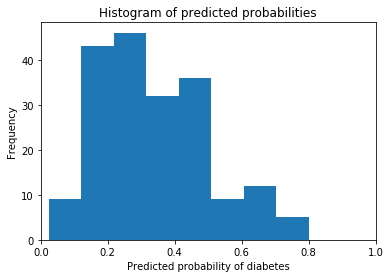

In [37]:
#histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

    Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [38]:
#predict diabetes if the predicted probabilities is greater than 0.3
from sklearn import preprocessing
y_pred_class = preprocessing.binarize([y_pred_prob], 0.3)[0]

In [39]:
#print the first 10 predicted probabilites
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [40]:
#print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [41]:
#previous confusion matrix (default threshold of 0.5)
confusion

array([[118,  12],
       [ 47,  15]])

In [42]:
#now confusion matrix (threshold of 0.3)
metrics.confusion_matrix(y_test, y_pred_class)

array([[80, 50],
       [16, 46]])

In [43]:
#sensitivity has increased (used to be 0.24)
46/float(46+16)

0.7419354838709677

In [44]:
#sensitivity has increased (used to be 0.24)
80/float(80+50)

0.6153846153846154

Conclusion:
- Threshold of 0.5 is used by default(for binary problems) to convert predicted possibilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

# ROC Curves and Area Under the Curve (AUC)

Question: Would not be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve

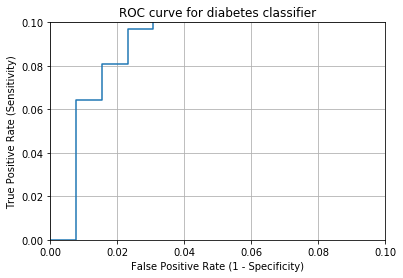

In [45]:
#IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 0.1])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

- You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [46]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [47]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [48]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


AUC is the percentage of the ROC plot that is underneath the curve:

In [49]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [50]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618



Confusion matrix advantages:

    Allows you to calculate a variety of metrics
    Useful for multi-class problems (more than two response classes)

ROC/AUC advantages:

    Does not require you to set a classification threshold
    Still useful when there is high class imbalance

In [51]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'styles/custom.css'